In [0]:
import matplotlib.pyplot as plt


In [2]:
%tensorflow_version 1.x #han  cambiado la version de tensorflow y la nueva no funciona. Trabajamos con al antigua

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.x #han  cambiado la version de tensorflow y la nueva no funciona. Trabajamos con al antigua`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [0]:
import gc

In [4]:
!pip install googledrivedownloader

In [0]:
import numpy as np
from google_drive_downloader import GoogleDriveDownloader as gdd

# **Fichero de Train original para entrenar la red**

In [6]:
gdd.download_file_from_google_drive(file_id='1hqeP49TE--k14IsiUQ71LS20uP9M_SYZ',
                                    dest_path='./x_train_gauss.npy.zip')




In [7]:
!mkdir x_train_gauss
!7z e x_train_gauss.npy.zip -o./x_train_gauss/



7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 4092134114 bytes (3903 MiB)

Extracting archive: x_train_gauss.npy.zip
--
Path = x_train_gauss.npy.zip
Type = zip
Physical Size = 4092134114
64-bit = +

  0%      0% - x_train_gauss.npy                          1% - x_train_gauss.npy                          2% - x_train_gauss.npy                          3% - x_train_gauss.npy                          4% - x_train_gauss.npy                          5% - x_train_gauss.npy                        

In [8]:
!ls x_train_gauss 

x_train_gauss.npy


In [0]:
x_train_gauss = np.load('x_train_gauss/x_train_gauss.npy')

In [10]:
x_train_gauss.shape

(5535, 320, 320)

In [11]:
x_train_gauss.max()

1.0

In [12]:
x_train_gauss.min()

0.0

In [0]:
x_train_gauss = x_train_gauss.reshape(-1, 320,320, 1)

In [14]:
x_train_gauss.shape

(5535, 320, 320, 1)

In [0]:
#x_train particion 80%
x_train = x_train_gauss[0:4428,:,:,:]

In [16]:
x_train.shape 

(4428, 320, 320, 1)

In [0]:
#x_testn particion 20%
x_test = x_train_gauss[4428:,:,:,:]

In [18]:
x_test.shape

(1107, 320, 320, 1)

In [0]:
del x_train_gauss

In [20]:
gc.collect()

318

**ploteamos x_test**

In [0]:
x_test_plot = x_test[0:5,:,:,:]

In [0]:
x_test_plot = x_test_plot.reshape(-1, 320,320)

In [0]:
x_test_plot.shape

(5, 320, 320)

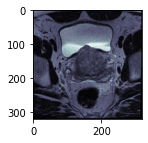

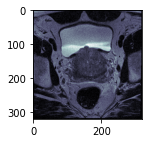

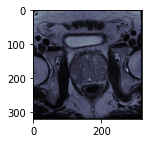

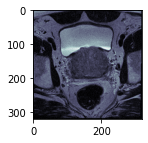

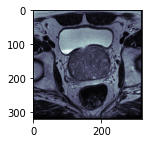

In [0]:
for i in x_test_plot[0:10]:
    plt.figure(figsize=(2,2))
    plt.imshow(i,cmap=plt.cm.bone)
    plt.show()

# **Generando las imagenes sin ruido para entrenar la red (y_train, y_test)**

In [21]:
gdd.download_file_from_google_drive(file_id='1qusasrxjcwkXrI0u-jot6Kl-pTf-jaNv',
                                    dest_path='./y_train.npy.zip')



In [22]:
!mkdir y_train
!7z e y_train.npy.zip -o./y_train/


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 1056797907 bytes (1008 MiB)

Extracting archive: y_train.npy.zip
--
Path = y_train.npy.zip
Type = zip
Physical Size = 1056797907
64-bit = +

  0%      0% - y_train.npy                    1% - y_train.npy                    2% - y_train.npy                    3% - y_train.npy                    4% - y_train.npy                    5% - y_train.npy                    6% - y_train.npy                    7% - y_train.npy                  

In [23]:
!ls y_train

y_train.npy


In [0]:
y_train = np.load('y_train/y_train.npy')

In [25]:
y_train.shape

(5535, 320, 320)

In [26]:
y_train.max()

1.0

In [27]:
y_train.min()

0.0

In [0]:
y_train = y_train.reshape(-1, 320,320, 1)

In [0]:
y_train_ = y_train[0:4428,:,:,:]


In [30]:
y_train_.shape

(4428, 320, 320, 1)

In [0]:
y_test_ = y_train[4428:,:,:,:]

In [32]:
y_test_.shape

(1107, 320, 320, 1)

In [33]:
del y_train 
gc.collect()

246

In [0]:
y_test_plot = y_test_[0:10,:,:,:]

In [0]:
y_test_plot = y_test_plot.reshape(-1, 320,320)

In [0]:
y_test_plot.shape

(10, 320, 320)

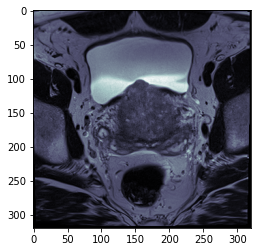

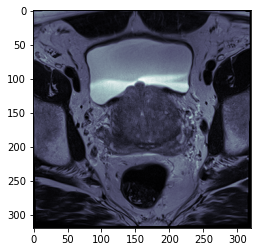

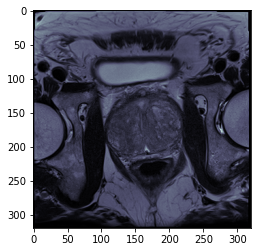

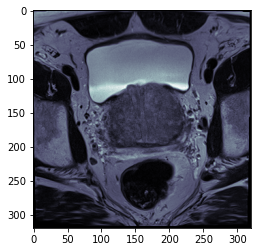

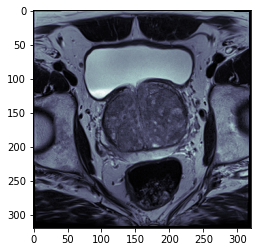

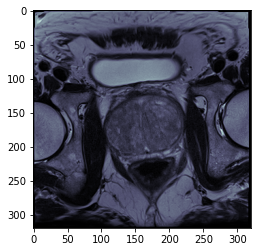

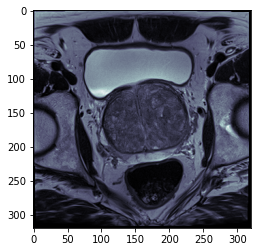

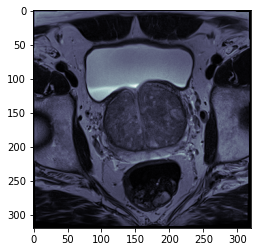

In [0]:
for i in y_test_plot[0:8]:
    plt.figure(figsize=(4,4))
    plt.imshow(i,cmap=plt.cm.bone)
    plt.show()

**Ploteamos imagenes con Ruido Gauss VS sin ruido**

In [34]:
x_test_plot =  x_test.copy()
x_test_plot = x_test_plot.reshape(-1, 320,320)
x_test_plot.shape

(1107, 320, 320)

In [35]:
y_test_plot =  y_test_.copy()
y_test_plot = y_test_plot.reshape(-1, 320,320)
y_test_plot.shape

(1107, 320, 320)

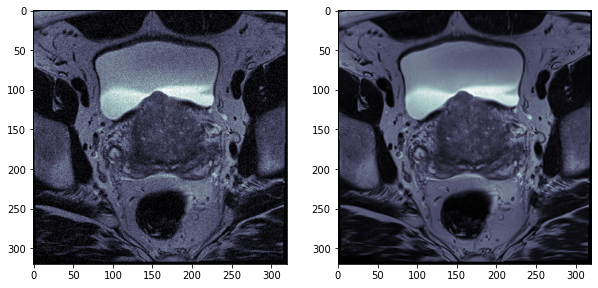

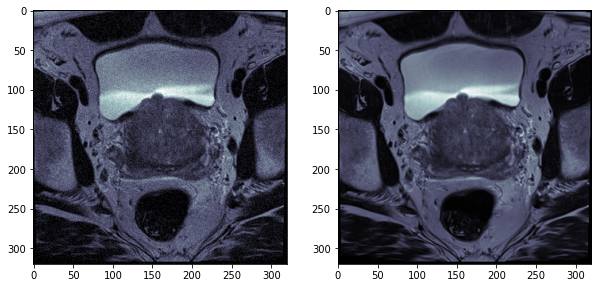

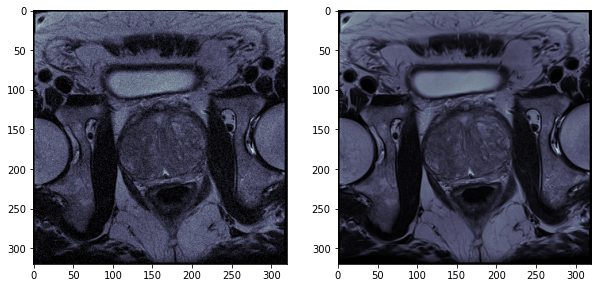

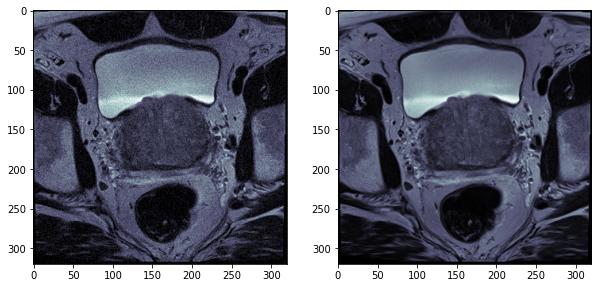

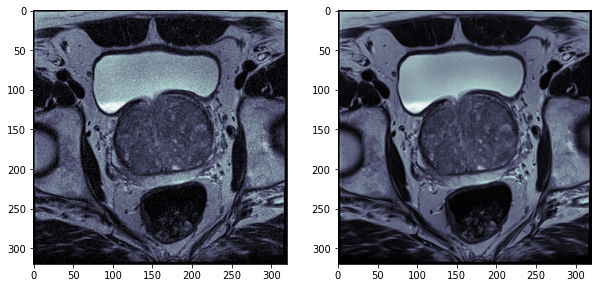

In [0]:
for test,real in zip (x_test_plot[0:5],y_test_plot[0:5]):
  
  fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 10))
  ax1.imshow(test,cmap=plt.cm.bone)
  ax2.imshow(real,cmap=plt.cm.bone)


**Generacion de encoder**

**modelo 1**

In [36]:
import keras

from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D,Dense
from keras.models import Model
from keras.optimizers import RMSprop

from keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score as R2_score

%matplotlib inline

Using TensorFlow backend.


In [0]:
batch_size = 70
#Nval = 200
epochs = 200
inChannel = 1
x, y = 320, 320
input_img = Input(shape = (x, y, inChannel))

In [0]:
def autoencoder(input_img):
    #encoder
    #input = 320 x 320 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #320 x 320 x 32
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #160 x 160 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #160 x 160 x 64
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #80 x 80 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #80 x 80 x 128 (small and thick)

    #decoder
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3) #80 x 80 x 128
    up1 = UpSampling2D((2,2))(conv4) # 160 x 160 x 128
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) # 160 x 160 x 64
    up2 = UpSampling2D((2,2))(conv5) # 320 x 320 x 64
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 320 x 320 x 1
    return decoded

In [0]:
model = Model(input_img, autoencoder(input_img))
model.compile(loss='mean_squared_error', optimizer='adam') #metrics=['mse']

In [0]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 320, 320, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 320, 320, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 160, 160, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 160, 160, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 80, 80, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 80, 80, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 80, 80, 128)       1475

In [0]:
history = model.fit(x_train, y_train_, batch_size=70,epochs=80,verbose=1,validation_data=(x_test, y_test_))#Hemos puesto 200 épocas a mano, para probar y sobreajusta.

Train on 4428 samples, validate on 1107 samples
Epoch 1/80
4428/4428 [==============================] - 110s 25ms/step - loss: 0.0161 - val_loss: 0.0035
Epoch 2/80
4428/4428 [==============================] - 100s 23ms/step - loss: 0.0030 - val_loss: 0.0026
Epoch 3/80
4428/4428 [==============================] - 100s 23ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 4/80
4428/4428 [==============================] - 100s 23ms/step - loss: 0.0019 - val_loss: 0.0032
Epoch 5/80
4428/4428 [==============================] - 100s 23ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 6/80
4428/4428 [==============================] - 100s 23ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 7/80
4428/4428 [==============================] - 100s 23ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 8/80
4428/4428 [==============================] - 100s 23ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 9/80
4428/4428 [==============================] - 101s 23ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 1

In [0]:
#bajamos el modelo en local
model.save('modelo1_gauss.h5')

from google.colab import files
files.download("modelo1_gauss.h5")

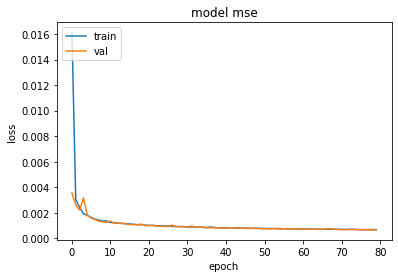

In [0]:
# summarize history for mse
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model mse')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
  

In [0]:
predict = model.predict(x_test)

In [0]:
predict.shape

(1107, 320, 320, 1)

In [0]:
predict = predict.reshape(-1,320,320)

In [0]:
predict_1d = predict.flatten()

In [0]:
y_test_1d = y_test_.flatten()

In [0]:
from sklearn.metrics import r2_score
error = r2_score(predict_1d, y_test_1d)

In [0]:
error

0.9777583409048026

In [0]:
predict_plot = predict.reshape(-1,320,320)

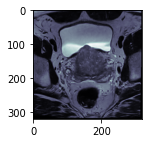

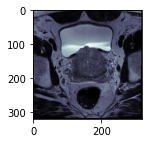

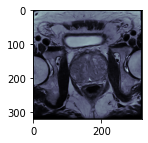

In [0]:
for i in predict_plot[0:3]:
    plt.figure(figsize=(2,2))
    plt.imshow(i,cmap=plt.cm.bone)
    plt.show()

In [0]:
 y_test_plot = y_test_.reshape(-1,320,320)

In [0]:
x_test_plot = x_test.reshape(-1,320,320)

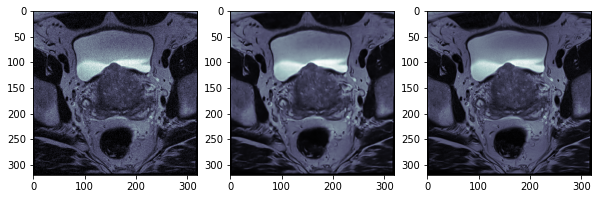

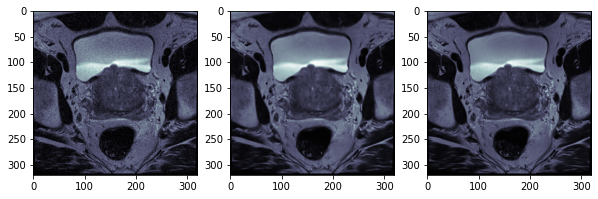

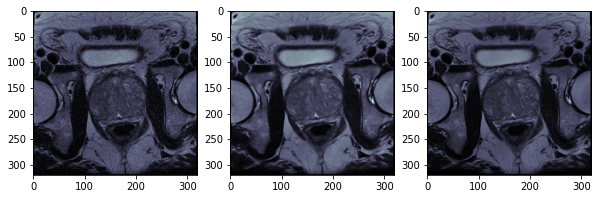

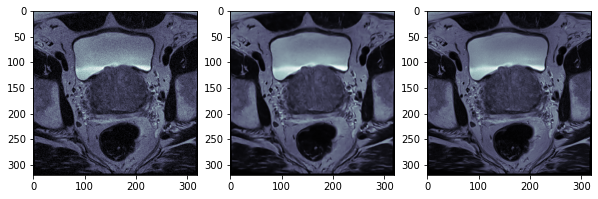

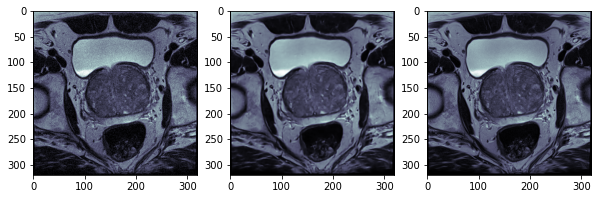

In [0]:
for salida,real,inicial in zip (predict_plot[0:5],y_test_plot[0:5], x_test_plot[0:5]):
  
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(10, 10))
  ax1.imshow(inicial,cmap=plt.cm.bone)#imagen perturbada con ruido
  ax2.imshow(salida,cmap=plt.cm.bone)#salida autoencoder
  ax3.imshow(real,cmap=plt.cm.bone)#imagen real sin ruido

In [0]:
predict_plot = predict_plot.flatten()  
y_test_plot = y_test_plot.flatten()
x_test_plot = x_test_plot.flatten()

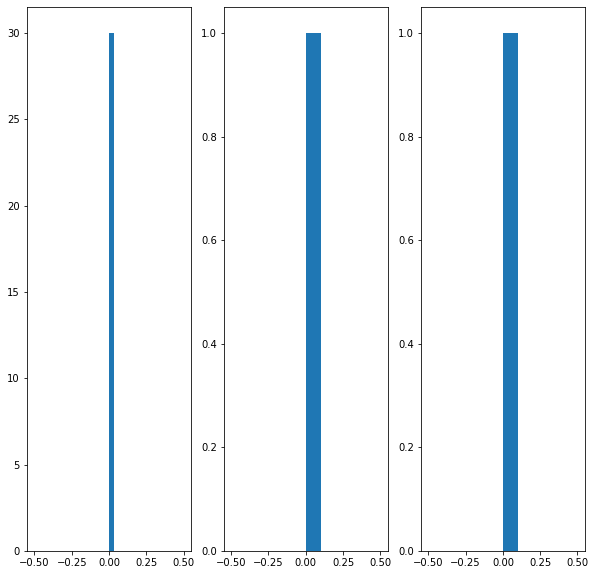

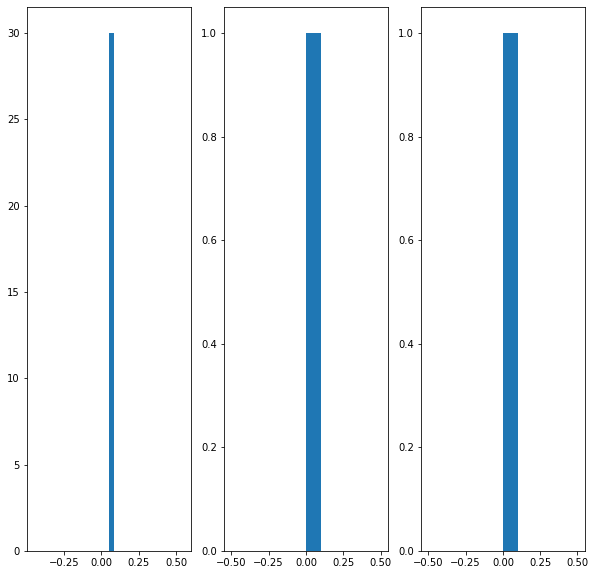

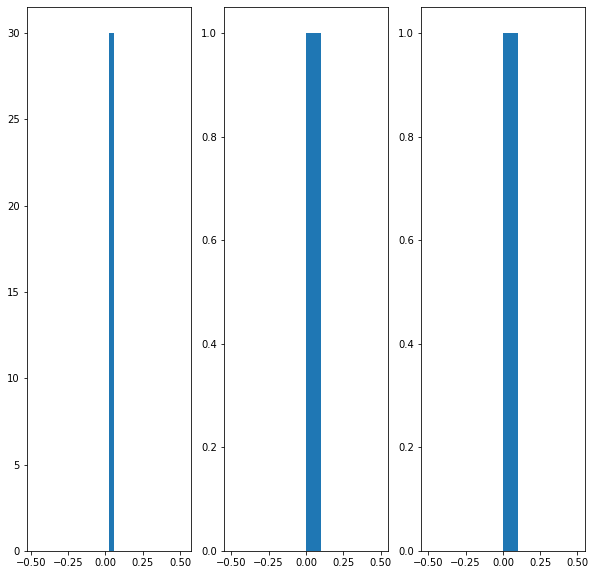

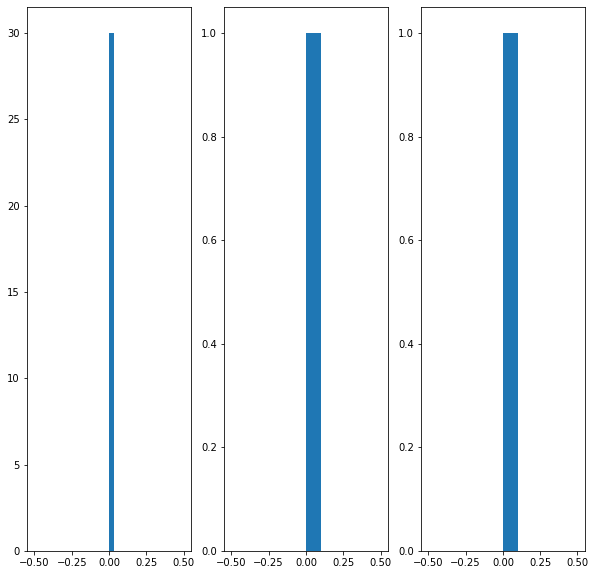

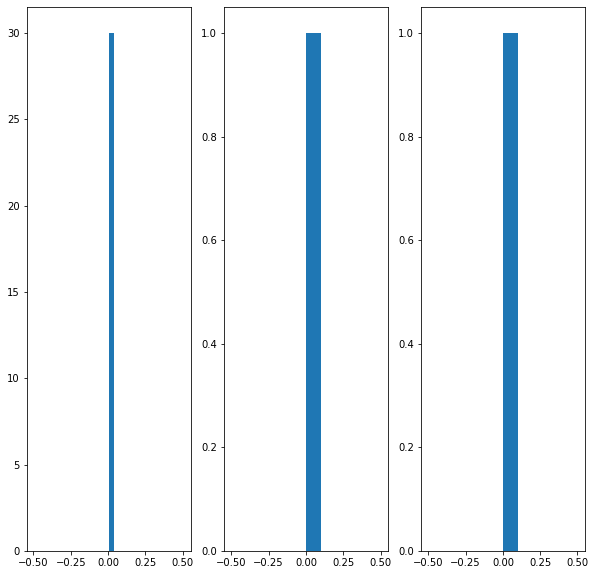

In [0]:
for salida,real,inicial in zip (predict_plot[0:5],y_test_plot[0:5], x_test_plot[0:5]):
  
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(10, 10))
  #ax1.hist(inicial, bins=30, density=True)#imagen perturbada con ruido
  #ax2.hist(salida)#salida autoencoder
  #ax3.hist(real)#imagen real sin ruido

  ax1.sns.distplot(inicial, hist=False, label='inicial')
  ax2.sns.distplot(salida, hist=False, label='salida')
  ax3.sns.distplot(real, hist=False, label='real')

**Modelo 2 Autoencoder** añadimos Batch normalization Layers

In [0]:

import keras

from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D,Dense
from keras.models import Model
from keras.optimizers import RMSprop

from keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score as R2_score

from keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from keras.layers.normalization import BatchNormalization

%matplotlib inline

In [0]:
batch_size = 70
#Nval = 200
epochs = 200
inChannel = 1
x, y = 320, 320
input_img = Input(shape = (x, y, inChannel))

In [0]:
def autoencoder(input_img):

  conv1 = Conv2D(16, (3,3), activation = 'relu', padding = "SAME")(input_img)
  conv1 = Dropout(0.2)(conv1)
  pool1 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv1)
  conv2 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(pool1)
  #conv2 = Dropout(0.2)(conv2)
  pool2 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv2)
  conv3 = Conv2D(64, (3,3), activation = 'relu', padding = "SAME")(pool2) 
  #pool3 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv3)

  upsampling_1 = Conv2DTranspose(64, 3, padding='same', activation='relu', strides=(2, 2))(conv3)
  upsampling_2 = Conv2DTranspose(32, 3, padding='same', activation='relu', strides=(2, 2))(upsampling_1)
  upsampling_3 = Conv2DTranspose(16, 3, padding='same', activation='relu', strides=(2, 2))(upsampling_2)
  outputs = Conv2DTranspose(1, 3, padding='same', activation='relu')(upsampling_2)
  return outputs


In [0]:
model = Model(input_img, autoencoder(input_img))
model.compile(loss='mean_squared_error', optimizer='adam') #metrics=['mse']

In [0]:
model.summary()


Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 320, 320, 1)       0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 320, 320, 16)      160       
_________________________________________________________________
dropout_20 (Dropout)         (None, 320, 320, 16)      0         
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 160, 160, 16)      0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 160, 160, 32)      4640      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 80, 80, 32)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 80, 80, 64)        184

In [0]:
history = model.fit(x_train, y_train_, batch_size=70,epochs=120,verbose=1,validation_data=(x_test, y_test_)) #ponemos 100 epocas

Train on 4428 samples, validate on 1107 samples
Epoch 1/120
4428/4428 [==============================] - 65s 15ms/step - loss: 0.0098 - val_loss: 0.0081
Epoch 2/120
4428/4428 [==============================] - 65s 15ms/step - loss: 0.0031 - val_loss: 0.0062
Epoch 3/120
4428/4428 [==============================] - 65s 15ms/step - loss: 0.0022 - val_loss: 0.0049
Epoch 4/120
4428/4428 [==============================] - 65s 15ms/step - loss: 0.0018 - val_loss: 0.0049
Epoch 5/120
4428/4428 [==============================] - 65s 15ms/step - loss: 0.0016 - val_loss: 0.0049
Epoch 6/120
4428/4428 [==============================] - 65s 15ms/step - loss: 0.0015 - val_loss: 0.0050
Epoch 7/120
4428/4428 [==============================] - 65s 15ms/step - loss: 0.0014 - val_loss: 0.0047
Epoch 8/120
4428/4428 [==============================] - 65s 15ms/step - loss: 0.0013 - val_loss: 0.0049
Epoch 9/120
4428/4428 [==============================] - 65s 15ms/step - loss: 0.0013 - val_loss: 0.0047
Epoch 1

In [0]:
#bajamos el modelo en local
model.save('modelo2_gauss.h5')

from google.colab import files
files.download("modelo2_gauss.h5")

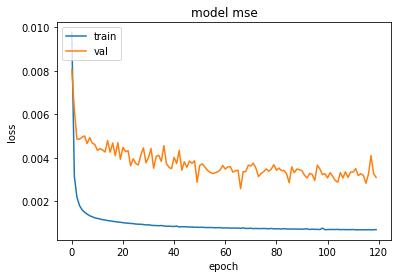

In [0]:
# summarize history for mse
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model mse')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
predict = model.predict(x_test)

In [0]:
predict.shape

(1107, 320, 320, 1)

In [0]:
predict = predict.reshape(-1,320,320)

In [0]:
predict_1d = predict.flatten()

In [0]:
y_test_1d = y_test_.flatten()

In [0]:
y_test_.max()

1.0

In [0]:
from sklearn.metrics import r2_score
error = r2_score(predict_1d, y_test_1d)

In [0]:
error

0.9670985356234275

In [0]:
predict_plot = predict.reshape(-1,320,320)

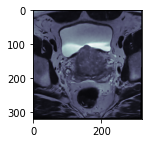

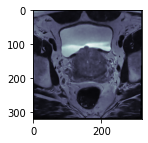

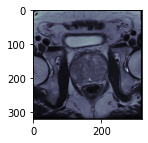

In [0]:
for i in predict_plot[0:3]:
    plt.figure(figsize=(2,2))
    plt.imshow(i,cmap=plt.cm.bone)
    plt.show()

In [0]:
y_test_plot = y_test_.reshape(-1,320,320)

In [0]:
x_test_plot = x_test.reshape(-1,320,320)

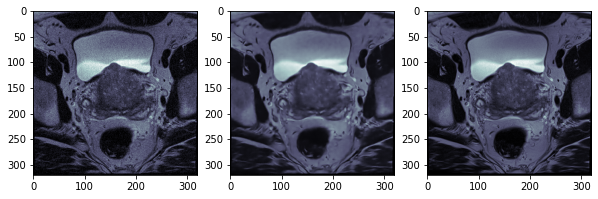

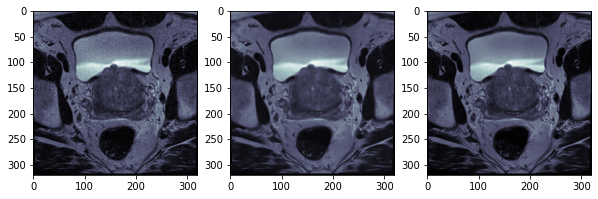

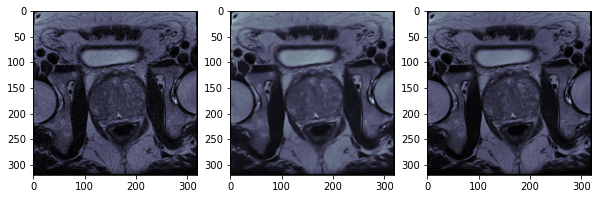

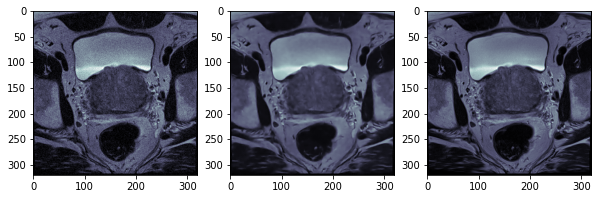

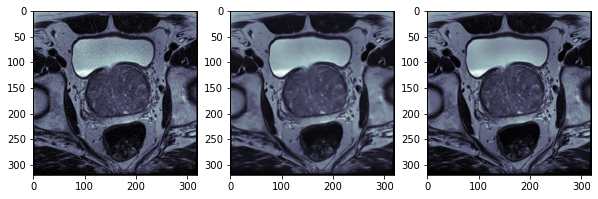

In [0]:
for salida,real,inicial in zip (predict_plot[0:5],y_test_plot[0:5], x_test_plot[0:5]):
  
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(10, 10))
  ax1.imshow(inicial,cmap=plt.cm.bone)#imagen perturbada con ruido
  ax2.imshow(salida,cmap=plt.cm.bone)#salida autoencoder
  ax3.imshow(real,cmap=plt.cm.bone)#imagen real sin ruido

In [0]:
predict_plot = predict_plot.flatten()  
y_test_plot = y_test_plot.flatten()
x_test_plot = x_test_plot.flatten()

In [0]:
for salida,real,inicial in zip (predict_plot[0:5],y_test_plot[0:5], x_test_plot[0:5]):
  
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(10, 10))
  ax1.hist(inicial, bins=30, density=True)#imagen perturbada con ruido
  ax2.hist(salida)#salida autoencoder
  ax3.hist(real)#imagen real sin ruido

**Modelo 3**

In [0]:

inChannel = 1
x, y = 320, 320
input_img = Input(shape = (x, y, inChannel))

In [0]:
def autoencoder3(input_img):

    
    #enoder 
    x = Conv2D(32, (3,3), activation='relu', padding='same', name='Conv1')(input_img)
    x = MaxPooling2D((2,2), padding='same', name='pool1')(x)
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv2')(x)
    x = MaxPooling2D((2,2), padding='same', name='pool2')(x)
    
    #decoder
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv3')(x)
    x = UpSampling2D((2,2), name='upsample1')(x)
    x = Conv2D(32, (3,3), activation='relu', padding='same', name='Conv4')(x)
    x = UpSampling2D((2,2), name='upsample2')(x)
    decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same', name='Conv5')(x)
    
  
    return decoded

In [0]:
modelo3 = Model(input_img, autoencoder3(input_img))
modelo3.compile(optimizer='adam', loss='mean_squared_error')
modelo3.summary()


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 320, 320, 1)       0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 320, 320, 32)      320       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 160, 160, 32)      0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 160, 160, 64)      18496     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 80, 80, 64)        0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 80, 80, 64)        36928     
_________________________________________________________________
upsample1 (UpSampling2D)     (None, 160, 160, 64)      0   

In [0]:
history3 = modelo3.fit(x_train, y_train_, batch_size=10,epochs=50,verbose=1,validation_data=(x_test, y_test_))


Train on 4428 samples, validate on 1107 samples
Epoch 1/50
4428/4428 [==============================] - 57s 13ms/step - loss: 0.0045 - val_loss: 0.0018
Epoch 2/50
4428/4428 [==============================] - 54s 12ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 3/50
4428/4428 [==============================] - 54s 12ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 4/50
4428/4428 [==============================] - 54s 12ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 5/50
4428/4428 [==============================] - 54s 12ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 6/50
4428/4428 [==============================] - 54s 12ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 7/50
4428/4428 [==============================] - 54s 12ms/step - loss: 0.0010 - val_loss: 9.9016e-04
Epoch 8/50
4428/4428 [==============================] - 54s 12ms/step - loss: 9.7770e-04 - val_loss: 9.5690e-04
Epoch 9/50
4428/4428 [==============================] - 54s 12ms/step - loss: 9.4440e-04 - val_loss: 9.0960e

In [0]:
#bajamos el modelo en local
modelo3.save('modelo3_gauss.h5')

from google.colab import files
files.download("modelo3_gauss.h5")


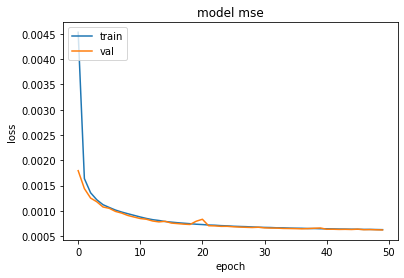

In [0]:
# summarize history for mse
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model mse')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
predict = modelo3.predict(x_test)

In [0]:
predict.shape

(1107, 320, 320, 1)

In [0]:
predict = predict.reshape(-1,320,320)

In [0]:
predict_1d = predict.flatten()

In [0]:
y_test_1d = y_test_.flatten()

In [0]:
from sklearn.metrics import r2_score
error = R2_score(predict_1d, y_test_1d)
error

0.9780038596565052

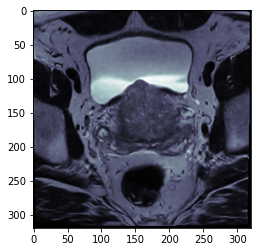

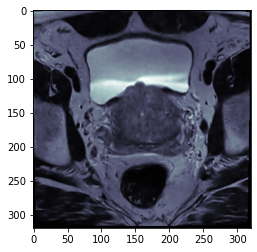

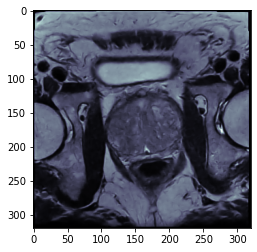

In [0]:
predict_plot = predict.reshape(-1,320,320)
for i in predict_plot[0:3]:
    plt.figure(figsize=(4,4))
    plt.imshow(i,cmap=plt.cm.bone)
    plt.show()

In [0]:
y_test_plot = y_test_.reshape(-1,320,320)

In [0]:
x_test_plot = x_test.reshape(-1,320,320)

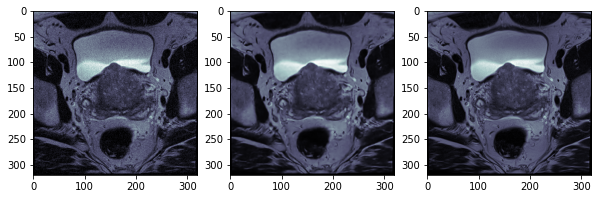

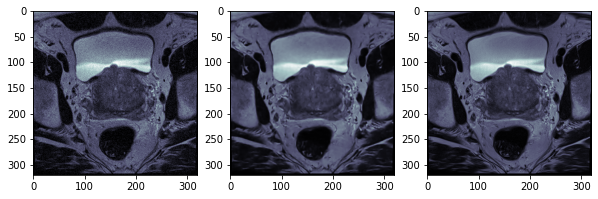

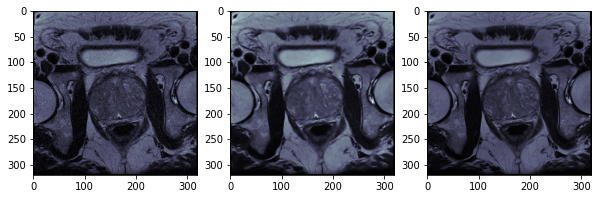

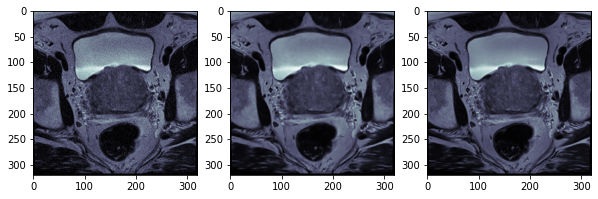

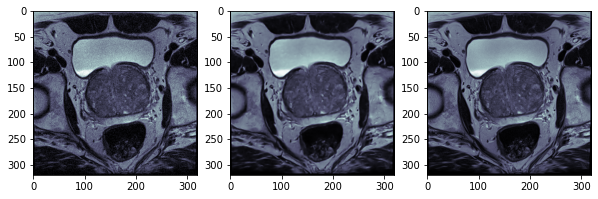

In [0]:
for salida,real,inicial in zip (predict_plot[0:5],y_test_plot[0:5], x_test_plot[0:5]):
  
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(10, 10))
  ax1.imshow(inicial,cmap=plt.cm.bone)#imagen perturbada con ruido
  ax2.imshow(salida,cmap=plt.cm.bone)#salida autoencoder
  ax3.imshow(real,cmap=plt.cm.bone)#imagen real sin ruido

**Modelo 4** añadiendo batch normalization

In [0]:

inChannel = 1
x, y = 320, 320
input_img = Input(shape = (x, y, inChannel))

In [0]:
def autoencoder4(input_img):

    
    #enoder 
    x = Conv2D(32, (3,3), activation='relu', padding='same', name='Conv1')(input_img)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2), padding='same', name='pool1')(x)
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv2')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2), padding='same', name='pool2')(x)
    
    #decoder
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv3')(x)
    x = UpSampling2D((2,2), name='upsample1')(x)
    x = Conv2D(32, (3,3), activation='relu', padding='same', name='Conv4')(x)
    x = UpSampling2D((2,2), name='upsample2')(x)
    decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same', name='Conv5')(x)
    
  
    return decoded

In [43]:
modelo4 = Model(input_img, autoencoder4(input_img))
modelo4.compile(optimizer='adam', loss='mean_squared_error')
modelo4.summary()












Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 320, 320, 1)       0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 320, 320, 32)      320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 320, 320, 32)      128       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 160, 160, 32)      0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 160, 160, 64)      18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 160, 160, 64)      256       
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 80, 80, 64) 

In [44]:
history4 = modelo4.fit(x_train, y_train_, batch_size=5,epochs=40,verbose=1,validation_data=(x_test, y_test_))




Train on 4428 samples, validate on 1107 samples
Epoch 1/40
4428/4428 [==============================] - 33s 8ms/step - loss: 0.0027 - val_loss: 0.0014
Epoch 2/40
4428/4428 [==============================] - 26s 6ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 3/40
4428/4428 [==============================] - 26s 6ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 4/40
4428/4428 [==============================] - 26s 6ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 5/40
4428/4428 [==============================] - 26s 6ms/step - loss: 0.0010 - val_loss: 9.1214e-04
Epoch 6/40
4428/4428 [==============================] - 26s 6ms/step - loss: 9.3721e-04 - val_loss: 8.0322e-04
Epoch 7/40
4428/4428 [==============================] - 26s 6ms/step - loss: 8.7376e-04 - val_loss: 7.7532e-04
Epoch 8/40
4428/4428 [==============================] - 26s 6ms/step - loss: 8.3482e-04 - val_loss: 7.7319e-04
Epoch 9/40
4428/4428 [==============================] - 26s 6ms/step - loss: 8.0977e-04 - val_loss

In [0]:
#bajamos el modelo en local
modelo4.save('modelo4_gauss.h5')

from google.colab import files
files.download("modelo4_gauss.h5")


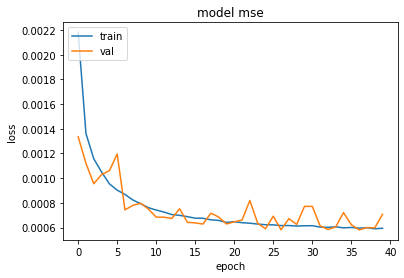

In [0]:
# summarize history for mse
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model mse')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
predict = modelo4.predict(x_test)

In [0]:
predict_1d = predict.flatten()

In [0]:
from sklearn.metrics import r2_score

In [0]:
y_test_1d = y_test_.flatten()

In [52]:
error = r2_score(predict_1d, y_test_1d)
error

0.9815714735347706

In [0]:
y_test_plot = y_test_.reshape(-1,320,320)

In [0]:
x_test_plot = x_test.reshape(-1,320,320)

In [0]:
predict_plot = predict.reshape(-1,320,320)

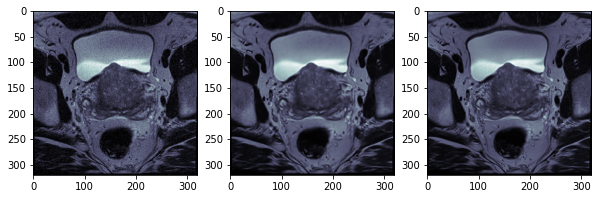

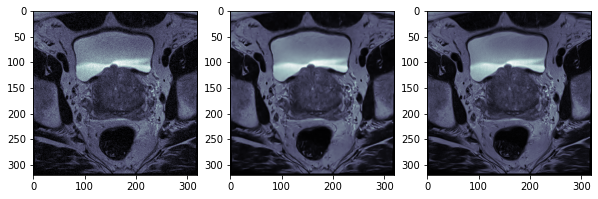

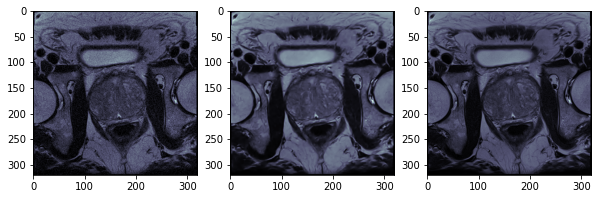

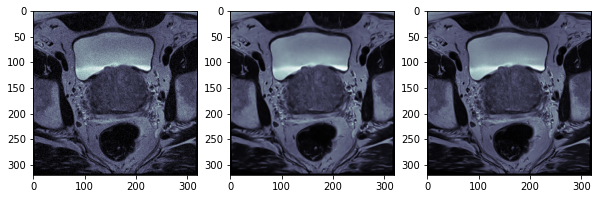

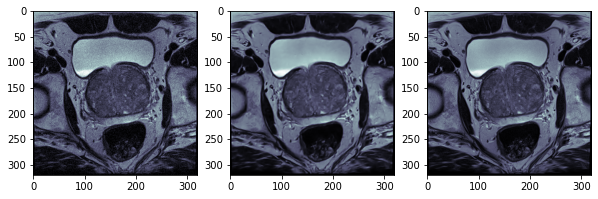

In [57]:
for salida,real,inicial in zip (predict_plot[0:5],y_test_plot[0:5], x_test_plot[0:5]):
  
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(10, 10))
  ax1.imshow(inicial,cmap=plt.cm.bone)#imagen perturbada con ruido
  ax2.imshow(salida,cmap=plt.cm.bone)#salida autoencoder
  ax3.imshow(real,cmap=plt.cm.bone)#imagen real sin ruido

**Modelo 5** U-Net

In [0]:
from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate

Using TensorFlow backend.


In [0]:
inChannel = 1
x, y = 320, 320
input_img = Input(shape = (x, y, inChannel))

In [0]:
# Build U-Net model
def unet(input_img):

  s = BatchNormalization()(input_img) # we can learn the normalization step
  s = Dropout(0.5)(s)

  c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (s)
  c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (c1)
  p1 = MaxPooling2D((2, 2)) (c1)

  c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (p1)
  c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (c2)
  p2 = MaxPooling2D((2, 2)) (c2)

  c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (p2)
  c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (c3)
  p3 = MaxPooling2D((2, 2)) (c3)

  c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (p3)
  c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (c4)
  p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

  c5 = Conv2D(128, (3, 3), activation='relu', padding='same') (p4)
  c5 = Conv2D(128, (3, 3), activation='relu', padding='same') (c5)

  u6 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (u6)
  c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (c6)

  u7 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (u7)
  c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (c7)

  u8 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (u8)
  c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (c8)

  u9 = Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same') (c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (u9)
  c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (c9)

  outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)
  return outputs


In [0]:
Unet = Model(input_img, unet(input_img))
Unet.compile(optimizer='adam', loss='mean_squared_error')


In [0]:
Unet.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 320, 320, 1)  0                                            
__________________________________________________________________________________________________
batch_normalization_2 (BatchNor (None, 320, 320, 1)  4           input_2[0][0]                    
__________________________________________________________________________________________________
dropout_2 (Dropout)             (None, 320, 320, 1)  0           batch_normalization_2[0][0]      
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 320, 320, 8)  80          dropout_2[0][0]                  
____________________________________________________________________________________________

In [0]:
history5 = Unet.fit(x_train, y_train_, batch_size=5,epochs=120,verbose=1,validation_data=(x_test, y_test_))

Train on 4428 samples, validate on 1107 samples
Epoch 1/100
4428/4428 [==============================] - 28s 6ms/step - loss: 0.0068 - val_loss: 0.0052
Epoch 2/100
4428/4428 [==============================] - 25s 6ms/step - loss: 0.0025 - val_loss: 0.0053
Epoch 3/100
4428/4428 [==============================] - 25s 6ms/step - loss: 0.0021 - val_loss: 0.0068
Epoch 4/100
4428/4428 [==============================] - 25s 6ms/step - loss: 0.0019 - val_loss: 0.0074
Epoch 5/100
4428/4428 [==============================] - 25s 6ms/step - loss: 0.0018 - val_loss: 0.0080
Epoch 6/100
4428/4428 [==============================] - 25s 6ms/step - loss: 0.0017 - val_loss: 0.0087
Epoch 7/100
4428/4428 [==============================] - 25s 6ms/step - loss: 0.0017 - val_loss: 0.0097
Epoch 8/100
4428/4428 [==============================] - 25s 6ms/step - loss: 0.0016 - val_loss: 0.0103
Epoch 9/100
4428/4428 [==============================] - 25s 6ms/step - loss: 0.0015 - val_loss: 0.0099
Epoch 10/100
442

In [0]:
#bajamos el modelo en local
Unet.save('Unet_gauss.h5')

from google.colab import files
files.download("Unet_gauss.h5")

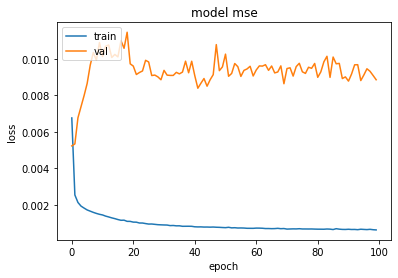

In [0]:
# summarize history for mse
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model mse')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
predict = Unet.predict(x_test)

In [0]:
predict_1d = predict.flatten()

In [0]:
y_test_1d = y_test_.flatten()

In [0]:
from sklearn.metrics import r2_score

error = r2_score(predict_1d, y_test_1d)
error

0.05354212971922223

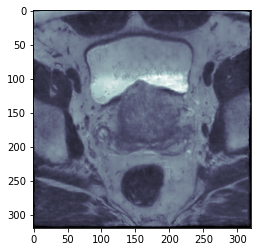

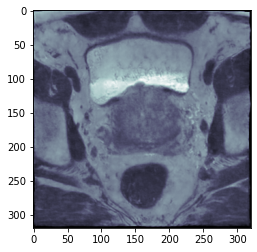

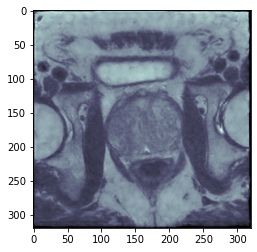

In [0]:
predict_plot = predict.reshape(-1,320,320)
for i in predict_plot[0:3]:
    plt.figure(figsize=(4,4))
    plt.imshow(i,cmap=plt.cm.bone)
    plt.show()

In [0]:
y_test_plot = y_test_.reshape(-1,320,320)

In [0]:
x_test_plot = x_test.reshape(-1,320,320)

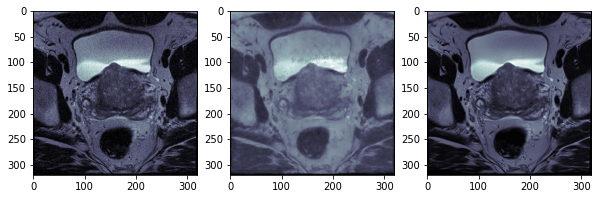

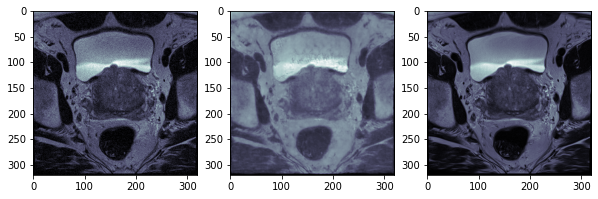

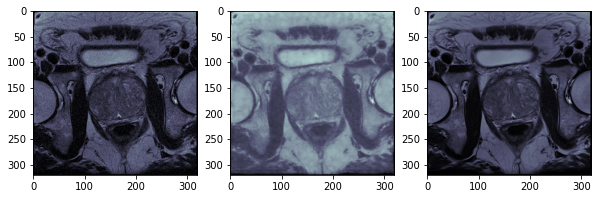

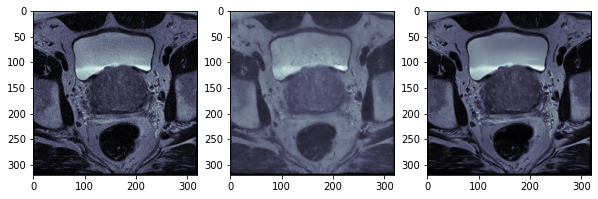

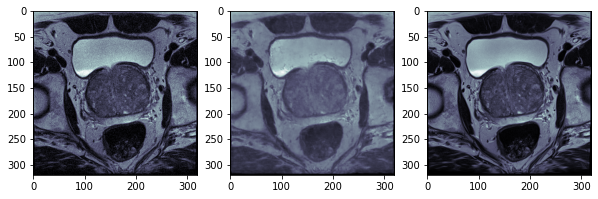

In [0]:
for salida,real,inicial in zip (predict_plot[0:5],y_test_plot[0:5], x_test_plot[0:5]):
  
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(10, 10))
  ax1.imshow(inicial,cmap=plt.cm.bone)#imagen perturbada con ruido
  ax2.imshow(salida,cmap=plt.cm.bone)#salida autoencoder
  ax3.imshow(real,cmap=plt.cm.bone)#imagen real sin ruido